## Importing Libraries and Data

In [ ]:
#general imports
import os
import tensorflow as tf
import numpy as np
import json

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

#imports for the management of the dataset
from sklearn.model_selection import train_test_split
import cv2
#import for data augmentation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
#imports for the display of the images and labels of the dataset
import time
from time import sleep
from matplotlib import cm
import matplotlib.pyplot as plt
#imports for the display of images of the test and the prediction
import tensorflow.compat.v2 as tf_v2
from PIL import Image
#imports for the realization of the model
from keras.models import Model

from keras.layers import Input, BatchNormalization, Dropout, UpSampling2D#, Activation, Dense
from keras.layers.convolutional import Conv2D , Conv2DTranspose
from keras.layers.core import Lambda
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.layers import LeakyReLU

# Set the seed for random operations in order to let the experiment be reproducible
SEED = 1234
tf.random.set_seed(SEED)  

# Get current working directory
cwd = os.getcwd()

In [ ]:
# Cell necessary when working on Colab with Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cell in which it unzips given the directory
!unzip -n 'drive/My Drive/DeepLearning/Data/Development_Dataset.zip'

# Processing and organization of the dataset





In [ ]:
train_dir = os.path.join(cwd, 'Development_Dataset/Training')
teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
filenames = []

#add to filenames all the images of both types Haricot and Mais of all the teams
for team in teams:
  filenames += os.listdir(train_dir + '/' + team + "/Haricot/Images")
  filenames += os.listdir(train_dir + '/' + team + "/Mais/Images")

#print(filenames)
#print("Training data:", len(filenames))

In [ ]:
#Remove .jpg from filenames
filenames = [string[:-4] for string in filenames]

In [ ]:
#Here we split the data set in two parts, 80% will be used for training and 20% for validation 
filenames_train, filenames_val = train_test_split(filenames,
                                                  test_size=.2,
                                                  shuffle=True,
                                                  random_state=1234)

print("Training data (after split):", len(filenames_train))
print("Validation data:", len(filenames_val))

Training data (after split): 576
Validation data: 144


In [ ]:
#The images that will be used for training and validation are written in the corresponding files which will contain the image names
dl_dir = '/content/drive/My Drive/DeepLearning/'
splits_dir = os.path.join(dl_dir, 'Splits')

if not os.path.exists(splits_dir):
    os.makedirs(splits_dir)

train_txt = splits_dir + '/train.txt'
val_txt = splits_dir + '/val.txt'

with open(train_txt, 'w') as f:
  for x in filenames_train: 
    f.write(x + '\n')

with open(val_txt, 'w') as f:
  for x in filenames_val: 
    f.write(x + '\n')

21

23

35

23

36

21

21

24

21

24

24

21

23

26

26

36

36

21

38

24

24

26

24

24

36

21

39

24

24

39

37

26

39

21

24

21

21

23

24

23

21

24

26

24

35

24

21

24

21

36

39

23

36

21

39

39

24

26

24

36

24

23

21

21

39

26

24

23

36

23

24

21

21

26

24

24

24

21

23

39

21

24

24

24

24

39

24

23

36

24

21

21

23

21

21

36

21

21

24

23

24

26

38

36

24

36

21

21

21

21

23

24

21

21

21

26

21

26

24

23

21

26

26

23

24

26

24

39

24

35

24

36

24

21

38

38

21

23

36

36

24

38

24

23

24

23

36

21

35

24

23

24

26

24

21

24

21

38

24

24

21

21

23

24

26

23

21

39

21

24

24

24

21

24

39

23

26

26

26

38

39

21

26

24

24

21

39

23

24

36

21

21

24

24

24

21

24

35

26

39

23

36

21

36

21

21

26

26

26

24

24

24

24

24

39

24

38

23

21

26

24

24

24

26

21

23

21

24

36

21

23

21

21

38

23

39

21

39

36

21

24

36

21

23

35

24

24

21

26

24

24

21

23

23

21

21

24

26

36

21

21

35

23

21

21

23

24

24

21

35

38

23

24

24

21

23

23

39

26

24

26

26

23

35

36

36

39

38

23

24

24

39

24

36

21

21

21

36

26

26

21

39

24

24

23

23

24

23

24

21

26

24

26

39

39

23

36

21

24

36

39

36

26

24

21

24

21

26

26

26

24

26

36

21

21

26

23

39

24

35

21

24

24

35

24

23

39

23

23

39

23

39

36

26

26

23

23

26

21

24

21

36

36

21

23

24

21

24

24

24

21

21

39

39

23

39

24

21

23

21

38

26

24

36

39

39

21

36

24

21

26

21

26

23

39

21

21

24

21

24

26

24

24

21

21

21

35

26

38

35

39

38

24

38

21

26

24

21

39

36

36

23

26

36

36

39

23

24

26

23

39

21

21

23

24

39

21

21

36

21

39

21

39

21

24

38

39

24

24

23

23

24

39

21

21

21

24

36

23

23

36

38

21

26

36

24

35

39

21

26

23

21

36

21

24

24

26

21

24

26

35

23

26

26

24

34

21

24

23

26

26

21

21

36

24

39

21

24

39

26

21

24

21

21

21

24

24

21

24

38

35

24

37

21

26

23

39

24

21

24

24

26

24

23

24

24

39

36

39

24

39

21

24

35

23

23

24

24

23

38

26

23

21

24

24

36

36

21

24

23

21

24

39

26

23

24

26

21

21

23

21

26

26

21

35

24

21

24

21

35

36

36

26

24

24

21

21

21

36

39

21

39

21

36

21

36

23

23

24

21

21

23

36

24

24

21

23

23

24

39

23

23

39

23

21

23

24

35

38

21

26

23

24

36

39

26

21

26

26

24

21

39

26

21

21

39

21

23

24

36

24

24

24

23

38

26

24

26

36

36

24

21

26

21

21

24

24

26

23

26

21

26

21

35

26

21

36

26

26

21

26

36

24

36

21

23

24

24

21

24

24

24

26

21

21

21

24

21

36

24

39

21

36

21

36

24

36

21

21

21

39

23

36

23

21

21

26

26

21

24

39

39

36

24

21

21

38

21

24

39

24

39

26

24

21

24

21

26

26

39

## Creation of Generators and of CustomDataset object

In [ ]:
apply_data_augmentation = True

#Create training ImageDataGenerator object in order to successively apply Data Augmentation 
#We need two different generators for images and corresponding masks
if apply_data_augmentation:
    img_data_gen = ImageDataGenerator(rotation_range=10,
                                      width_shift_range=10,
                                      height_shift_range=10,
                                      zoom_range=0.3,
                                      horizontal_flip=True,
                                      rescale=1./255, ##aggiunto successivamente
                                      vertical_flip=True, 
                                      fill_mode='reflect')
    mask_data_gen = ImageDataGenerator(rotation_range=10,
                                       width_shift_range=10,
                                       height_shift_range=10,
                                       zoom_range=0.3,
                                       horizontal_flip=True,
                                       vertical_flip=True,
                                       fill_mode='reflect')



valid_img_data_gen = ImageDataGenerator(rescale=1./255)
valid_mask_data_gen = ImageDataGenerator()

In [ ]:
#Support function 
def read_rgb_mask(mask_arr):
  
    #img_path: path to the mask file
    #Returns the numpy array containing target values

    new_mask_arr = np.zeros(mask_arr.shape[:2], dtype=mask_arr.dtype)

    # Use RGB dictionary in 'RGBtoTarget.txt' to convert RGB to target
    new_mask_arr[np.where(np.all(mask_arr == [254, 124, 18], axis=-1))] = 0
    new_mask_arr[np.where(np.all(mask_arr == [255, 255, 255], axis=-1))] = 1
    new_mask_arr[np.where(np.all(mask_arr == [216, 67, 82], axis=-1))] = 2

    return new_mask_arr

In [ ]:
#Support function 
def parse_image_name(filename):
  names = filename.split('_')
  return names[0], names[1].capitalize()

In [ ]:
# CustomDataset inheriting from tf.keras.utils.Sequence
#the custom dataset returns a single sample from the dataset. Then, we use a tf.data.Dataset object to group samples into batches.
class CustomDataset(tf.keras.utils.Sequence):

  # Constructor
  def __init__(self, dl_dir, dataset_dir, which_subset, img_generator=None, mask_generator=None, 
               preprocessing_function=None, out_shape=(2048, 2048)):
    if which_subset == 'training':
      subset_file = os.path.join(dl_dir, 'Splits', 'train.txt')
    elif which_subset == 'validation':
      subset_file = os.path.join(dl_dir, 'Splits', 'val.txt')
    
    with open(subset_file, 'r') as f:
      lines = f.readlines()
    
    subset_filenames = []
    for line in lines:
      subset_filenames.append(line.strip()) 

    self.which_subset = which_subset
    self.dataset_dir = dataset_dir
    self.subset_filenames = subset_filenames
    self.img_generator = img_generator
    self.mask_generator = mask_generator
    self.preprocessing_function = preprocessing_function
    self.out_shape = out_shape

  # Returns the total number of samples in the dataset
  def __len__(self):
    return len(self.subset_filenames)


  # Returns a sample from the dataset after processing it
  def __getitem__(self, index):
    
    curr_filename = self.subset_filenames[index]

    team, plant = parse_image_name(curr_filename)
    img_path = self.dataset_dir + '/' + team + '/' + plant
    
    if(team == 'Roseau'):
      img_extension = '.png'
    else:
      img_extension = '.jpg'

    # Image processing and resizing
    #img = Image.open(os.path.join(img_path, 'Images', curr_filename + img_extension)).convert('RGB')
    img = cv2.imread(os.path.join(img_path, 'Images', curr_filename + img_extension), cv2.IMREAD_UNCHANGED) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #mask_img = Image.open(os.path.join(img_path, 'Masks', curr_filename + '.png')).convert('RGB')
    mask_img = cv2.imread(os.path.join(img_path, 'Masks', curr_filename + '.png'), cv2.IMREAD_UNCHANGED)
    mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2RGB)
    #mask_img = mask_img.resize([2048, 2048], Image.ANTIALIAS)
    mask_img = cv2.resize(mask_img, self.out_shape, interpolation = cv2.INTER_AREA) 
    mask_arr = np.array(mask_img)
    # apply support function declared above
    mask_arr = read_rgb_mask(mask_arr)
    #img = img.resize(self.out_shape,Image.ANTIALIAS)
    img = cv2.resize(img, self.out_shape, interpolation = cv2.INTER_AREA) 
    img_arr = np.array(img) 
    mask_arr = np.expand_dims(mask_arr, -1)

    if self.which_subset == 'training' or self.which_subset == 'validation':
      if self.img_generator is not None and self.mask_generator is not None:
        # Perform data augmentation
        # We can get a random transformation from the ImageDataGenerator using get_random_transform
        # and we can apply it to the image using apply_transform
        transformation = self.img_generator.get_random_transform(img_arr.shape)
        
        img_arr = self.img_generator.apply_transform(img_arr, transformation)
        # ImageDataGenerator use bilinear interpolation for augmenting the images.
        # Thus, when applied to the masks it will output 'interpolated classes', which
        # is an unwanted behaviour. As a trick, we can transform each class mask 
        # separately and then we can cast to integer values (as in the binary segmentation notebook).
        # Finally, we merge the augmented binary masks to obtain the final segmentation mask.
        out_mask = np.zeros_like(mask_arr)
        for c in np.unique(mask_arr):
          if c > 0:
            curr_class_arr = np.float32(mask_arr == c)
            curr_class_arr = self.mask_generator.apply_transform(curr_class_arr, transformation)
            # from [0, 1] to {0, 1}
            curr_class_arr = np.uint8(curr_class_arr)
            # recover original class
            curr_class_arr = curr_class_arr * c 
            out_mask += curr_class_arr
    else:
      out_mask = mask_arr
    
    if self.preprocessing_function is not None:
        img_arr = self.preprocessing_function(img_arr)

    return img_arr, np.float32(out_mask)

In [ ]:
#Image sizes
img_h = 2048
img_w = 2048

#Creation of CustomDataset objects for training and validation datasets
dataset = CustomDataset(dl_dir, train_dir, 'training', 
                        img_generator=img_data_gen, mask_generator=mask_data_gen, 
                        #preprocessing_function=preprocess_input
                        )
dataset_valid = CustomDataset(dl_dir, train_dir, 'validation', 
                              img_generator=valid_img_data_gen, mask_generator=valid_mask_data_gen #CAMbiato
                              #preprocessing_function=preprocess_input
                              )

In [ ]:
#Training
train_dataset = tf.data.Dataset.from_generator(lambda: dataset,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([img_h, img_w, 3], [img_h, img_w, 1])
                                               )

train_dataset = train_dataset.batch(1)

train_dataset = train_dataset.repeat()

#Validation
valid_dataset = tf.data.Dataset.from_generator(lambda: dataset_valid,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([img_h, img_w, 3], [img_h, img_w, 1])
                                               )
valid_dataset = valid_dataset.batch(1)

valid_dataset = valid_dataset.repeat()

In [ ]:
#Here it is possible to test the augmentation and visualize it 
%matplotlib inline

# Assign a color to each class
colors = [[255,255,255],[216,67,82]]

iterator = iter(valid_dataset) #This can be changed to train_dataset
valid_dataset

<RepeatDataset shapes: ((None, 2048, 2048, 3), (None, 2048, 2048, 1)), types: (tf.float32, tf.float32)>

[0. 1. 2.]
(2048, 2048) (2048, 2048, 3)


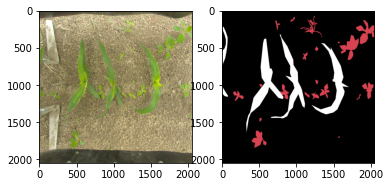

In [ ]:
fig, ax = plt.subplots(1, 2)

augmented_img, target = next(iterator)
augmented_img = augmented_img[0]   # First element
#augmented_img = augmented_img  # denormalize

target = np.array(target[0, ..., 0])   # First element (squeezing channel dimension)

print(np.unique(target))
target_img = np.zeros([target.shape[0], target.shape[1], 3])

print(target.shape, target_img.shape)
target_img[np.where(target == 0)] = [0, 0, 0]
for i in range(1, 3):
  target_img[np.where(target == i)] = np.array(colors[i-1])[:3]

ax[0].imshow(np.uint8(augmented_img))
ax[1].imshow(np.uint8(target_img))

plt.show()

## Implementation of UNET 


In [ ]:
inputs = Input((img_h, img_w, 3))
s = Lambda(lambda x: x )(inputs) ##CAMBIATO il / 255

c1 = Conv2D(16, (3, 3), kernel_initializer='he_normal',strides=(1, 1),
                            padding='same')(s)
c1 = BatchNormalization()(c1)
c1 = LeakyReLU(alpha=0.1)(c1)
#c1 = tf.keras.layers.Dropout(0.1)(c1)

c1 = Conv2D(16, (3, 3), kernel_initializer='he_normal',strides=(1, 1),
                            padding='same')(c1)

p1 = MaxPooling2D((2, 2))(c1)

c2 = Conv2D(32, (3, 3), kernel_initializer='he_normal',strides=(1, 1),
                            padding='same')(p1)
c2 = BatchNormalization()(c2)
c2 = LeakyReLU(alpha=0.1)(c2)
#c2 = tf.keras.layers.Dropout(0.1)(c2)


c2 = Conv2D(32, (3, 3), kernel_initializer='he_normal',strides=(1, 1),
                            padding='same')(c2)

p2 = MaxPooling2D((2, 2))(c2)

c3 = Conv2D(64, (3, 3), kernel_initializer='he_normal',strides=(1, 1),
                            padding='same')(p2)
c3 = BatchNormalization()(c3)
c3 = LeakyReLU(alpha=0.1)(c3) #Instead of using the ReLU as activation function we decided to apply the Leaky ReLU
#c3 = tf.keras.layers.Dropout(0.2)(c3)

c3 = Conv2D(64, (3, 3), kernel_initializer='he_normal',strides=(1, 1),
                            padding='same')(c3)

p3 = MaxPooling2D((2, 2))(c3)

c4 = Conv2D(128, (3, 3), kernel_initializer='he_normal',strides=(1, 1),
                            padding='same')(p3)
c4 = BatchNormalization()(c4)
c4 = LeakyReLU(alpha=0.1)(c4)
#c4 = tf.keras.layers.Dropout(0.2)(c4)

c4 = Conv2D(128, (3, 3), kernel_initializer='he_normal',strides=(1, 1),
                            padding='same')(c4)

p4 = MaxPooling2D(pool_size=(2, 2))(c4)

c5 = Conv2D(256, (3, 3), kernel_initializer='he_normal', strides=(1, 1),
                            padding='same')(p4)    
c5 = BatchNormalization()(c5)
c5 = LeakyReLU(alpha=0.1)(c5)
#c5 = tf.keras.layers.Dropout(0.3)(c5)

c5 = Conv2D(256, (3, 3), kernel_initializer='he_normal', strides=(1, 1),
                            padding='same')(c5)

u6 = UpSampling2D(2, interpolation='bilinear')(c5) #tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')
u6 = concatenate([u6, c4])
c6 = Conv2D(256, (3, 3), kernel_initializer='he_normal',strides=(1, 1),
                            padding='same')(u6)
c6 = BatchNormalization()(c6)
c6 = LeakyReLU(alpha=0.1)(c6)
#c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = Conv2D(128, (3, 3), kernel_initializer='he_normal',strides=(1, 1),
                            padding='same')(c6)

u7 = UpSampling2D(2, interpolation='bilinear')(c6) #tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), kernel_initializer='he_normal',strides=(1, 1),
                            padding='same')(u7)
c7 = BatchNormalization()(c7)
c7 = LeakyReLU(alpha=0.1)(c7)
#c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = Conv2D(64, (3, 3), kernel_initializer='he_normal',strides=(1, 1),
                            padding='same')(c7)

u8 = UpSampling2D(2, interpolation='bilinear')(c7) #tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), kernel_initializer='he_normal',strides=(1, 1),
                            padding='same')(u8)
c8 = Dropout(0.1)(c8)
c8 = Conv2D(32, (3, 3), kernel_initializer='he_normal',strides=(1, 1),
                            padding='same')(c8)

u9 = UpSampling2D(2, interpolation='bilinear')(c8) #tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), kernel_initializer='he_normal',strides=(1, 1),
                            padding='same')(u9)  
c9 = BatchNormalization()(c9)
c9 = LeakyReLU(alpha=0.1)(c9)
#c9 = tf.keras.layers.Dropout(0.2)(c9)

c9 = Conv2D(16, (3, 3), kernel_initializer='he_normal',strides=(1, 1),
                            padding='same')(c9)       
c9 = BatchNormalization()(c9)
c9 = LeakyReLU(alpha=0.1)(c9)

outputs = Conv2D(3, (1, 1), activation='softmax')(c9)

model = Model(inputs=[inputs], outputs=[outputs])                            

# Visualize created model as a table
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2048, 2048,  0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 2048, 2048, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 2048, 2048, 1 448         lambda[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 2048, 2048, 1 64          conv2d[0][0]                     
______________________________________________________________________________________________

## Hyperparameters and Training of the model

In [ ]:
# Here we define the intersection over union for each class in the batch.
# Then we compute the final iou as the mean over classes
def meanIoU(y_true, y_pred):
    # get predicted class from softmax
    y_pred = tf.expand_dims(tf.argmax(y_pred, -1), -1)

    per_class_iou = []

    for i in range(1,3): # exclude the background class 0
      # Get prediction and target related to only a single class (i)
      class_pred = tf.cast(tf.where(y_pred == i, 1, 0), tf.float32)
      class_true = tf.cast(tf.where(y_true == i, 1, 0), tf.float32)
      intersection = tf.reduce_sum(class_true * class_pred)
      union = tf.reduce_sum(class_true) + tf.reduce_sum(class_pred) - intersection
    
      iou = (intersection + 1e-7) / (union + 1e-7)
      per_class_iou.append(iou)

    return tf.reduce_mean(per_class_iou)

In [ ]:
# Optimization params
# -------------------

# Loss
loss = tf.keras.losses.SparseCategoricalCrossentropy() # Sparse Categorical Crossentropy to use integers (mask) instead of one-hot encoded labels

# Learning rate
lr = 1e-4

optimizer = tf.keras.optimizers.Adam(learning_rate=lr) #standard choice

# Validation metrics
metrics = ['accuracy', meanIoU]

# Compile Model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
cwd = os.getcwd()
callbacks = []

# Early stopping was applied and also a LR adapter callback, which helps us to get into the right minimum. 
early_stop = True
if early_stop:
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
    callbacks.append(es_callback)
    
#LRPlateau
lr_plateau_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,
    patience=2,
    min_lr=0,
)    

callbacks.append(lr_plateau_callback)    
model.fit(x=train_dataset,
          epochs=7,
          steps_per_epoch=len(dataset),
          validation_data=valid_dataset,
          validation_steps=len(dataset_valid),
          callbacks = callbacks
          )

Epoch 1/7
576/576 [==============================] - 1772s 3s/step - loss: 0.8647 - accuracy: 0.7402 - meanIoU: 0.1733 - val_loss: 0.6404 - val_accuracy: 0.8316 - val_meanIoU: 0.1796
Epoch 2/7
576/576 [==============================] - 1764s 3s/step - loss: 0.4094 - accuracy: 0.9524 - meanIoU: 0.3500 - val_loss: 0.5718 - val_accuracy: 0.7956 - val_meanIoU: 0.2202
Epoch 3/7
576/576 [==============================] - 1766s 3s/step - loss: 0.2652 - accuracy: 0.9584 - meanIoU: 0.3876 - val_loss: 0.6213 - val_accuracy: 0.7762 - val_meanIoU: 0.2224
Epoch 4/7
576/576 [==============================] - 1750s 3s/step - loss: 0.1890 - accuracy: 0.9616 - meanIoU: 0.4161 - val_loss: 0.4663 - val_accuracy: 0.7952 - val_meanIoU: 0.2148
Epoch 5/7
576/576 [==============================] - 1745s 3s/step - loss: 0.1491 - accuracy: 0.9631 - meanIoU: 0.4311 - val_loss: 0.4760 - val_accuracy: 0.7937 - val_meanIoU: 0.2486
Epoch 6/7
576/576 [==============================] - 1745s 3s/step - loss: 0.1255 - a

## Testing

*This section includes all the functions required for the realization of the predictions, a visualization of the prediction generated by the trained model and the creation of the json file for the submission*



In [ ]:
# Let's visualize the predictions on the test set done by the trained model
%matplotlib inline
iterator = iter(valid_dataset)
colors = [[255,255,255],[216,67,82]]

(1, 2048, 2048, 3)

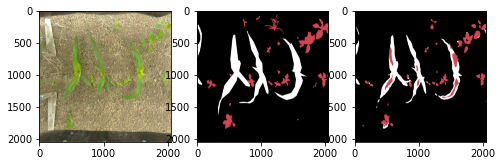

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(8, 8))
fig.show()
image, target = next(iterator)

image = image[0]
target = target[0, ..., 0]

#prediction
out_sigmoid = model.predict(x=tf.expand_dims(image, 0))

# Get predicted class as the index corresponding to the maximum value in the vector probability
predicted_class = tf.argmax(out_sigmoid, -1)
out_sigmoid.shape

predicted_class = predicted_class[0, ...]

# Assign colors for visualization
target_img = np.zeros([target.shape[0], target.shape[1], 3])
prediction_img = np.zeros([target.shape[0], target.shape[1], 3])

target_img[np.where(target == 0)] = [0, 0, 0]
for i in range(1, 3):
  target_img[np.where(target == i)] = np.array(colors[i-1])[:3] 

prediction_img[np.where(predicted_class == 0)] = [0, 0, 0]
for i in range(1, 3):
  prediction_img[np.where(predicted_class == i)] = np.array(colors[i-1])[:3] 

#Visualize the image, label and prediction
ax[0].imshow(np.uint8(image))
ax[1].imshow(np.uint8(target_img))
ax[2].imshow(np.uint8(prediction_img))

fig.canvas.draw()
time.sleep(1)

In [ ]:
target.shape

TensorShape([2048, 2048])

In [ ]:
#Here, given the img name as input, the prediction is created
def create_mask_prediction(img_name):

  image = cv2.imread(img_name, cv2.IMREAD_UNCHANGED)

  shape = image.shape 

  image_array = cv2.resize (image, (2048,2048), interpolation = cv2.INTER_AREA)
  prediction = model.predict(tf.expand_dims(image_array, axis=0))
  prediction = tf_v2.image.resize(prediction, (shape[0],shape[1]), method='bicubic', antialias=True ) ##upscaling to original img size with bicubic interpolation method
  mask_arr = tf.argmax(prediction, -1)[0, ...]

  mask_arr = np.array(mask_arr)
  return mask_arr

In [ ]:
#Support function for the encoding
def rle_encode(img):
    '''
    img: numpy array, 1 - foreground, 0 - background
    Returns run length as string formatted
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    #print(runs)
    return ' '.join(str(x) for x in runs)

In [ ]:
#Support function for the correct addition of data to the submission file
def mask_arr_to_file(submission_dict, img_name, mask_arr):

  team_name , crop_name = parse_image_name(img_name)  

  img_name = img_name[:-4]

  #appends to json
  submission_dict[img_name] = {}
  submission_dict[img_name]['shape'] = mask_arr.shape
  submission_dict[img_name]['team'] = team_name
  submission_dict[img_name]['crop'] = crop_name
  submission_dict[img_name]['segmentation'] = {}

  rle_encoded_crop = rle_encode(mask_arr == 1)
  rle_encoded_weed = rle_encode(mask_arr == 2)

  #print("run",rle_encoded_crop)

  submission_dict[img_name]['segmentation']['crop'] = rle_encoded_crop
  submission_dict[img_name]['segmentation']['weed'] = rle_encoded_weed

In [ ]:
test_dir = os.path.join(cwd, 'Development_Dataset/Test_Dev/')
teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
crops = ["Haricot" ,"Mais"]
filenames = []
submission_dict = {}

#Iteration on all images of both plant types of the four teams belonging to the test dataset
for team in teams:

  for crop in crops:

    filenames = os.listdir(test_dir + team + "/" + crop + "/Images")

    for img_name in filenames:

      path = os.path.join(test_dir, team + "/" + crop + "/Images/" + img_name)
      
      mask_arr = create_mask_prediction(path)
      #im = plt.imshow(mask_arr)
      #im.show()

      mask_arr_to_file(submission_dict, img_name, mask_arr)

In [ ]:
#Creation and saving of submission json file in Predictions directory
pred_dir = '/content/drive/My Drive/DeepLearning/Predictions'

if not os.path.exists(pred_dir):
    os.makedirs(pred_dir)

with open(pred_dir + '/submission.json', 'w') as f:
  json.dump(submission_dict, f)